In [1]:
#import the libraries
import numpy as p
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv("Salary_dataset.csv")

In [3]:
#basic feature engineering
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.tail(2)

,Unnamed: 0,YearsExperience,Salary
28,28,10.4,122392.0
29,29,10.6,121873.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
df.drop(columns=["Unnamed: 0"] , inplace=True)

In [20]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [8]:
df.head(2)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

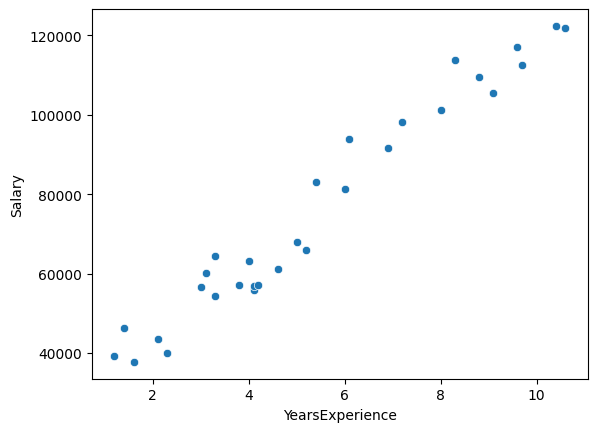

In [18]:
#basic plots
sns.scatterplot(df, x="YearsExperience",	y="Salary")

<Axes: xlabel='YearsExperience', ylabel='Salary'>

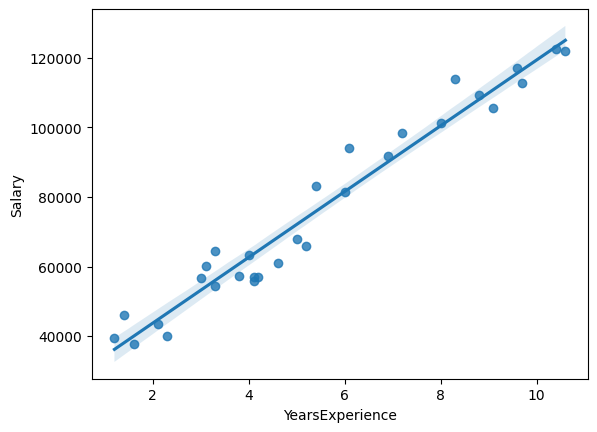

In [19]:
sns.regplot(df , x="YearsExperience",	y="Salary")

In [21]:
X=df.iloc[:,:-1].values
y=df["Salary"].values

In [34]:
y=y.astype("int")

In [26]:
X=X.astype("int")

In [35]:
#train test split
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(X ,y ,test_size=0.2 , random_state=42)

### as the data is linear we can easily apply the linear regression

In [36]:
#linear regression data
from sklearn.linear_model import LinearRegression
le=LinearRegression()
model=le.fit(X_train ,y_train)

In [39]:
model.coef_

array([9617.4])

In [38]:
model.rank_

1

In [40]:
model.intercept_

np.float64(26121.625000000015)

In [41]:
y_pred=model.predict(X_test)

### BEFORE the standard Scaler

In [42]:
#model_evalution
from sklearn.metrics import r2_score
r2_score=r2_score(y_pred, y_test)

from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_pred, y_test)

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_pred, y_test)


In [43]:
print(f"the r2_score is: {r2_score}")
print(f"the r2_score is: {MAE}")
print(f"the r2_score is: {MSE}")

the r2_score is: 0.8872814127514383
the r2_score is: 6272.124999999995
the r2_score is: 54735639.8039583


### AFTER THE STANDARD SCALER

In [44]:
#sclaing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [53]:
from sklearn.preprocessing import MinMaxScaler
me=MinMaxScaler()
X_train_scaled1=me.fit_transform(X_train)
X_test_scaled1=me.transform(X_test)

In [51]:
X_train_scaled[0]

array([1.77704663])

In [57]:
X_train_scaled1[0]

array([1.])

In [55]:
model2=model.fit(X_train_scaled1, y_train)
y_pred2=model2.predict(X_test_scaled1)

In [56]:
from sklearn.metrics import r2_score
r2_score1=r2_score(y_pred2, y_test)

from sklearn.metrics import mean_absolute_error
MAE1=mean_absolute_error(y_pred2, y_test)

from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(y_pred2, y_test)

print(f"the r2_score is: {r2_score1}")
print(f"the mae is: {MAE1}")
print(f"the mse is: {MSE1}")


the r2_score is: 0.8872814127514385
the mae is: 6272.125
the mse is: 54735639.8039583


In [63]:
model.predict(X_test_scaled[0].reshape(-1,1))

array([112678.225])

In [71]:
import pickle
filename = '/content/trained_model.pkl'

with open(filename, 'wb') as file:
     pickle.dump(model, file)

### lets make our own class -code from the scrach

In [ ]:
class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

lr = MeraLR()
lr.fit(X_train,y_train)

X_train.shape

np.insert(X_train,0,1,axis=1).shape
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)